# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [43]:
import numpy as np
from scipy import optimize 
# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import inauguralproject


%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import ipywidgets as widgets


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

We first define the model 

In [97]:
# We begin with setting the parameters

m = 1
v = 10 
e = 0.3
t0 = 0.4
t1 = 0.1
k = 0.4
w = 1

# We define the utility 

def utility(c, l, v, e):
    u = np.log(c) - v*((l**(1+(1/e)))/(1+(1/e)))
    return u

def budget(l, w, m, t0, t1, k):
    max_value = np.max(w*l-k,0)
    x = m + w*l - (t0*w*l + t1*max_value)
    return x


# We now define the objective function
def obj(l, w, e, t0, t1, k , v, m):
    c = budget(m = m, w = w, l = l, t0 = t0, t1 = t1, k = k )
    return -utility(l = l, c = c, e = e, v = v)

# We define the optimizer and find optimum 
def optimizer(w, e, v, t0, t1, k, m):
    sol = optimize.minimize_scalar(obj, method = 'bounded', bounds = (0,1), args = (w, e, v, t0, t1, k, m))
    l_best = sol.x
    c_best = budget(m = m, w = w, l = l_best, t0 = t0, t1 = t1, k = k)
    u_best = utility(l = l_best, c = c_best, e = e, v = v)

    return l_best, c_best, u_best

l_best, c_best, u_best = optimizer(w = w, e = e,v = v,t0 = t0,t1 = t1,k = k, m = m)

# f. print resultat
print(f'Optimal labour supply is {l_best:.3f}')
print(f'Optimal consumption is {c_best:.3f}')
print(f'maximized utility is {u_best:.3f}')


Optimal labour supply is 0.382
Optimal consumption is 1.231
maximized utility is 0.172


C:\Users\Frede\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log
  


# Question 2

ADD ANSWER.

C:\Users\Frede\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log
  


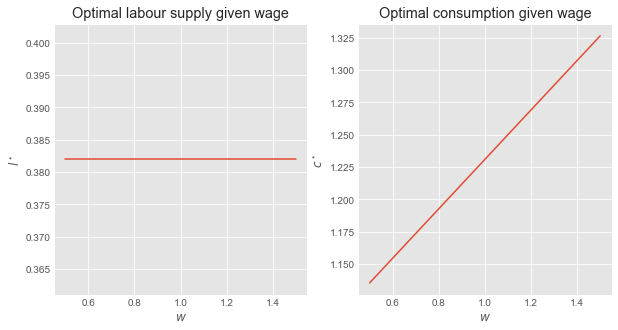

In [107]:
plt.style.use('ggplot')
N=1000
w_vec = np.linspace(0.5, 1.5, num=N)
#Create some empty list


l_opt = np.empty(N)
c_opt = np.empty(N)


for i,w in enumerate(w_vec):
    opt = optimizer(w,e,v,t0,t1,k,m)
    l_opt[i] = opt[0]
    c_opt[i] = opt[1]

# a. create a figure
fig = plt.figure(figsize=(10,5))

# c. left plot
ax_left = fig.add_subplot(1,2,1)

ax_left.plot(w_vec,l_opt)

ax_left.set_title('Optimal labour supply given wage')
ax_left.set_xlabel('$w$')
ax_left.set_ylabel('$l^\star$')
ax_left.grid(True)

# c. right plot
ax_right = fig.add_subplot(1,2,2)

ax_right.plot(w_vec,c_opt)

ax_right.set_title('Optimal consumption given wage')
ax_right.set_xlabel('$w$')
ax_right.set_ylabel('$c^\star$')
ax_right.grid(True)

plt.show()

# Question 3

ADD ANSWER.

In [108]:
N = 10000 
np.random.seed(100)
w_list = np.random.uniform(low=0.5,high=1.5,size=N)


# Question 4

ADD ANSWER.

In [5]:
# code

# Question 5

ADD ANSWER.

C:\Users\Frede\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


# Conclusion

ADD CONCISE CONLUSION.